### Compute Fermat distance for the MNIST data set 

This notebook computes the fermat distance between the images in the MNIST data set. We are reading the data set from https://www.kaggle.com/oddrationale/mnist-in-csv#mnist_train.csv 

**Contents**:

    1- Preprocessing data
    2- Computing Fermat distance
    3- Visualization using t-sne

### 1- Preprocessing data

In [3]:
import random
import numpy as np
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

from fermat import Fermat

Reading mnist data from https://www.kaggle.com/oddrationale/mnist-in-csv#mnist_train.csv

In [35]:
all_data = np.loadtxt('../data/mnist_train.csv', skiprows=1, delimiter=',')
labels = all_data[:, 0].astype(int)
data = all_data[:, 1:]/255.0

### 2- Computing Fermat distance

In [6]:
# we only consider a sample of data points
test_size = 1000 

In [7]:
# compute euclidean distances between data points
distances = distance_matrix(data[:test_size], data[:test_size])

In [9]:
# Initialize the fermat model
# The distances would be computed used the aprox method and the euclidean distances as input
f = Fermat(alpha = 4, path_method='L', k=30, landmarks=30)


# fit the Fermat model
f.fit(distances)

Fermat(alpha=4, estimator='up', k=30, landmarks=30, path_method='L', seed=None)

###  3- Visualization

In [85]:
def plot_figure(data,S,s_labels, xlabel):
    plt.figure(figsize=(20, 10))
    plt.xlabel(xlabel, fontsize='large')
    for digit in range(10):
        plt.plot(*data[s_labels == digit].T, 'o', label=str(digit))    
    plt.legend(numpoints=1)

In [41]:
tsne = TSNE(n_components=2, perplexity=60, n_iter=1000)

### T-sne on the euclidean distance

In [16]:
tsne_euclidean = tsne.fit_transform(distances)

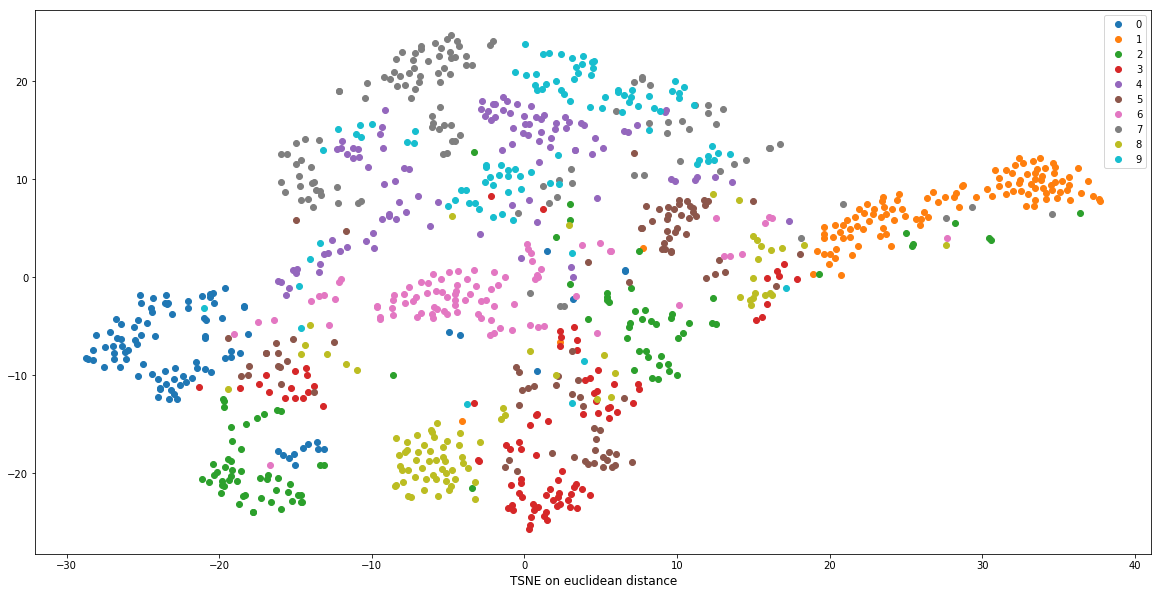

In [86]:
plot_figure(tsne_euclidean, test_size, labels[:test_size], "TSNE on euclidean distance")


### T-sne on the Fermat distance

In [87]:
tsne_fermat = tsne.fit_transform(f.get_distances())

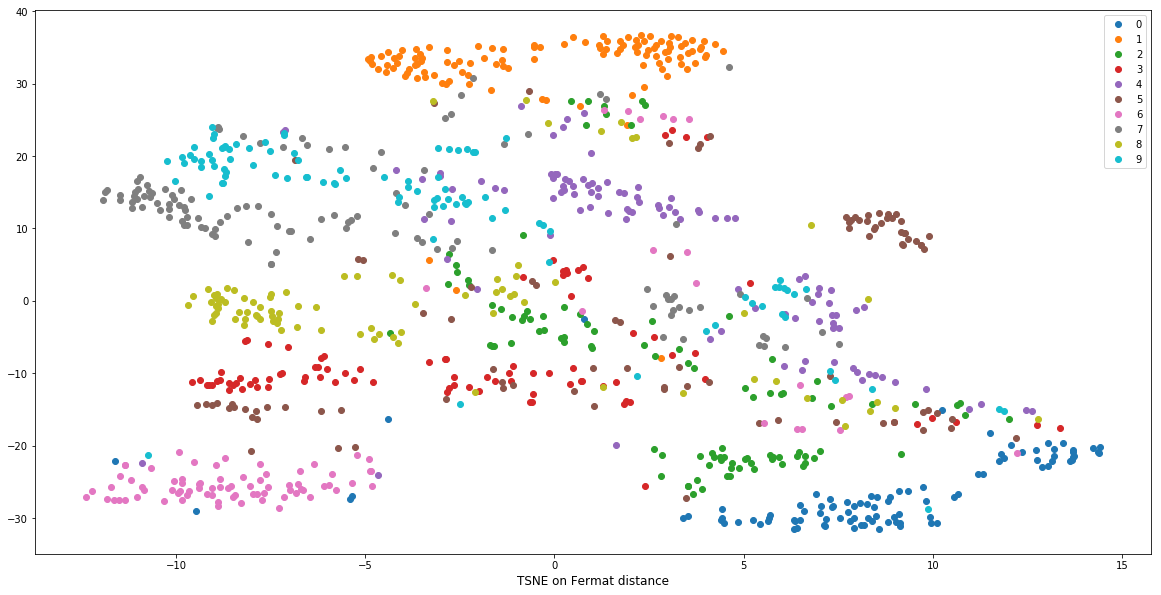

In [88]:
plot_figure(tsne_fermat, test_size, labels[:test_size], "TSNE on Fermat distance") 